## IMPORTING DATA

In [ ]:
import pandas as pd
import numpy as np
#Importing the data
#Link to data: https://drive.google.com/file/d/1z3AN8qN3Sz1UTkDp_Bd8pGi4qqb2rXxu/view?usp=sharing
url = 'https://drive.google.com/file/d/1z3AN8qN3Sz1UTkDp_Bd8pGi4qqb2rXxu/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
pd.set_option('display.max_colwidth', 500)
df.head(5)

,Text,Class
0,"Supply Quality China's EXCLUSIVE dimensions at Unbeatable Price.Dear Sir, We are pleased to inform you as one of China's largest export & import sto=ne company-Wanlistone Group, The Group its subsidiaries specialize in the q=uarrying, processing and Sales of dimension stone, slab and tiles and dimen=sion stone products for the building materials sector and specialty markets==2E The Group operations are based in Xiamen, South of China, which is the lar=gest export and import business portals ...",1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost you with a request that would be of immense benefit to both of us. Being an executor of wills, it is possible that we may be tempted to make fortune out of our client's situations, when we cannot help it, or left with no better option. The issue I am presenting to you is a case of my client who willed a fortune to his next-of-kin. It was most unfortunate that he and his next-of-kin died on the same day the 31st October 1999 in an Egyptian airline...",1
3,"MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD. BRANCH,CENTRAL HONG KONG,HONG KONG. Let me start by introducing myself. I am Mr.Cheung Pui director of operations of the Hang Seng Bank Ltd. I have an urgent business suggestion for you.I honestly apologize and hope I do not cause you much embarrassment by contacting you through this means for a transaction of this magnitude,but this is due to confidentiality and prompt access reposed on this medium.Furthermore,due to this issue on my hands now,...",1
4,Not a surprising assessment from Embassy.,0


In [ ]:
df.shape

(11929, 2)

In [ ]:
#Check for missing values
df.dropna(inplace = True)
df.info()
#There are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11928 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11928 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.6+ KB


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
def plot_cm(y_actual,y_pred):
  cf_matrix = confusion_matrix(y_actual,y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


def metrics(actual,pred):
  print('accuracy: %s%%' % round(accuracy_score(actual,pred)*100,0))
  print('precision: %s%%' % round(precision_score(actual,pred)*100,0))
  print('recall: %s%%' % round(recall_score(actual,pred)*100,0))
  print('f1_score: %s%%' % round(f1_score(actual,pred)*100,0))

## DATA CLEANING & PROCESSING

In [ ]:
#Converting the text to lower case 
import re
df['Text'] = df['Text'].astype(str).apply(lambda x: x.lower()) 
df.head(5)

#Remove "=" symbol from data
df['Text'] = df['Text'].apply(lambda x: x.replace("=",''))
df.head(5)

,Text,Class
0,"supply quality china's exclusive dimensions at unbeatable price.dear sir, we are pleased to inform you as one of china's largest export & import stone company-wanlistone group, the group its subsidiaries specialize in the quarrying, processing and sales of dimension stone, slab and tiles and dimension stone products for the building materials sector and specialty markets2e the group operations are based in xiamen, south of china, which is the largest export and import business portals in chi...",1
1,over. sidlet me know. thx.,0
2,"dear friend,greetings to you.i wish to accost you with a request that would be of immense benefit to both of us. being an executor of wills, it is possible that we may be tempted to make fortune out of our client's situations, when we cannot help it, or left with no better option. the issue i am presenting to you is a case of my client who willed a fortune to his next-of-kin. it was most unfortunate that he and his next-of-kin died on the same day the 31st october 1999 in an egyptian airline...",1
3,"mr. cheung puihang seng bank ltd.des voeux rd. branch,central hong kong,hong kong. let me start by introducing myself. i am mr.cheung pui director of operations of the hang seng bank ltd. i have an urgent business suggestion for you.i honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitude,but this is due to confidentiality and prompt access reposed on this medium.furthermore,due to this issue on my hands now,...",1
4,not a surprising assessment from embassy.,0


In [ ]:
#Extracting url from the text
df['Url'] = df['Text'].apply(lambda x: re.findall("http\S+",x))
#Create new feature called Url_Count
df['Url_Count'] = df['Url'].apply(lambda x: len(x))

#Extracting email from the text 
df['Email'] = df['Text'].apply(lambda x: re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",x))
#Create new feature called Email_Count
df['Email_Count'] = df['Email'].apply(lambda x: len(x))

df.head(8)


,Text,Class,Url,Url_Count,Email,Email_Count
0,"supply quality china's exclusive dimensions at unbeatable price.dear sir, we are pleased to inform you as one of china's largest export & import stone company-wanlistone group, the group its subsidiaries specialize in the quarrying, processing and sales of dimension stone, slab and tiles and dimension stone products for the building materials sector and specialty markets2e the group operations are based in xiamen, south of china, which is the largest export and import business portals in chi...",1,[],0,[],0
1,over. sidlet me know. thx.,0,[],0,[],0
2,"dear friend,greetings to you.i wish to accost you with a request that would be of immense benefit to both of us. being an executor of wills, it is possible that we may be tempted to make fortune out of our client's situations, when we cannot help it, or left with no better option. the issue i am presenting to you is a case of my client who willed a fortune to his next-of-kin. it was most unfortunate that he and his next-of-kin died on the same day the 31st october 1999 in an egyptian airline...",1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0
3,"mr. cheung puihang seng bank ltd.des voeux rd. branch,central hong kong,hong kong. let me start by introducing myself. i am mr.cheung pui director of operations of the hang seng bank ltd. i have an urgent business suggestion for you.i honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitude,but this is due to confidentiality and prompt access reposed on this medium.furthermore,due to this issue on my hands now,...",1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1
4,not a surprising assessment from embassy.,0,[],0,[],0
5,monica -huma abedin <huma@clintonemail.com>tuesday june 29 2010 6:01 am'hanleymr@state.gov'; hre:is already is locked for tonite. i am seeing her right before actually.,0,[],0,"[huma@clintonemail.com, hanleymr@state.gov]",2
6,pis print.h <hrod17@clintonemail.com>thursday october 8 2009 8:01 pm'jilotylc@state.gov'fw: whi - powder coatingb6,0,[],0,"[hrod17@clintonemail.com, jilotylc@state.gov]",2
7,dear tom--h <hrod17@clintonemail.com>friday december 11 2009 5:41 pmcould we schedule a call?i have several matters i'd like to discuss w you this weekend and was hoping we can schedule a call. i'm free tonightafter 10; tomorrow btw 8-10am and sunday btw 8-ham and after 10pm. do any of those times work for you?and by the way i'm still laughing about the yurt! hillary,0,[],0,[hrod17@clintonemail.com],1


In [ ]:
#Removing all symbols from the text except the "$" symbol
df['Text'] = df["Text"].apply(lambda x: re.sub('[^a-z$\s]','',x))
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0
1,over sidlet me know thx,0,[],0,[],0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1
4,not a surprising assessment from embassy,0,[],0,[],0


In [ ]:
#Adding the the email's length as a feature called "Text_Length"
df["Text_Length"] = df["Text"].apply(lambda x: len(x))
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059
1,over sidlet me know thx,0,[],0,[],0,23
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1,3333
4,not a surprising assessment from embassy,0,[],0,[],0,40


0    6742
1    5186
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency of Email Address in Text')

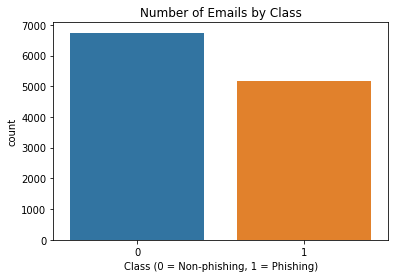

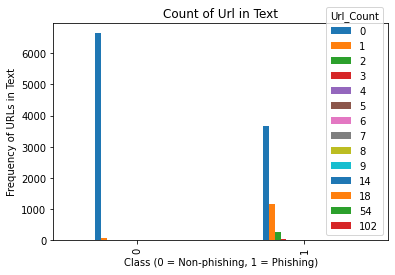

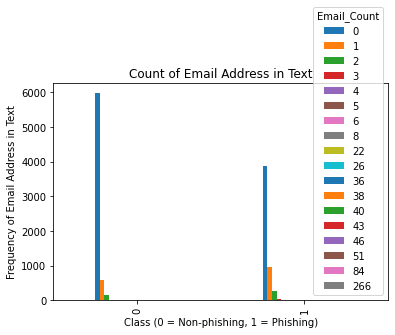

In [ ]:
#Plotting graphs to analysing the data
import matplotlib.pyplot as plt
import seaborn as sns

#Number of phishing emails vs how many non-phishing emails
print(df["Class"].value_counts())
sns.countplot(df['Class'])
plt.title('Number of Emails by Class')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')

#Analysing count of Url in text
pd.crosstab(df['Class'],df['Url_Count']).plot(kind='bar')
plt.title('Count of Url in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of URLs in Text')
#There are presence of outliers

#Analysing count of Email in text
pd.crosstab(df['Class'],df['Email_Count']).plot(kind='bar')
plt.title('Count of Email Address in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Email Address in Text')
#There are presence of outliers


In [ ]:
#Removing outliers (3 standard deviations away from the mean)

#Drop outliers in Url_Count 
range = df['Url_Count'].mean() + df['Url_Count'].std()*3 
df = df.loc[(df["Url_Count"] <= range)]

#Drop outliers in Email_Count 
range = df['Email_Count'].mean() + df['Email_Count'].std()*3 
df = df.loc[(df["Email_Count"] <= range)]



0    6732
1    5135
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency of Email Address in Text')

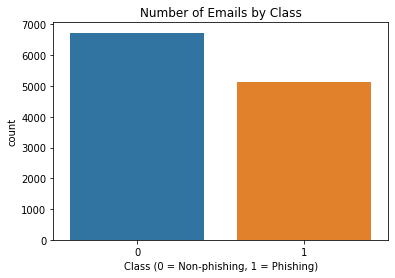

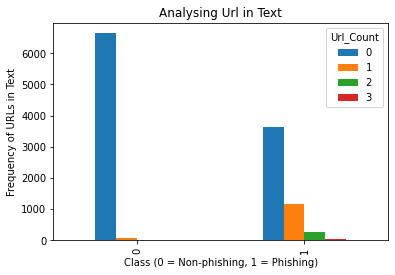

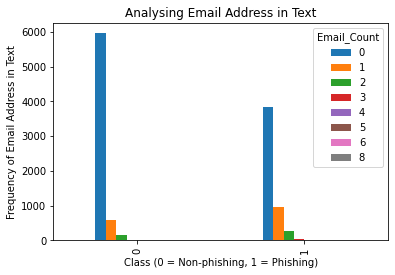

In [ ]:
#Plotting the graphs against after removing the outliers
#Number of phishing emails vs how many non-phishing emails
print(df["Class"].value_counts())
sns.countplot(df['Class'])
plt.title('Number of Emails by Class')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')

pd.crosstab(df['Class'],df['Url_Count']).plot(kind='bar')
plt.title('Analysing Url in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of URLs in Text')
#Presence of outliers

pd.crosstab(df['Class'],df['Email_Count']).plot(kind='bar')
plt.title('Analysing Email Address in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Email Address in Text')


In [ ]:
#Drop outliers in Text_Length
range = df['Text_Length'].mean() + df['Text_Length'].std()*3 
df = df.loc[(df["Text_Length"] <= range)]

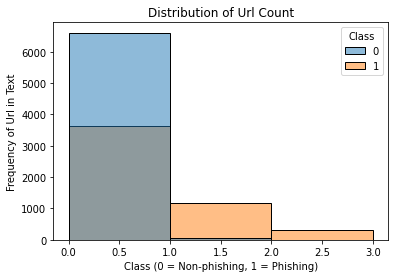

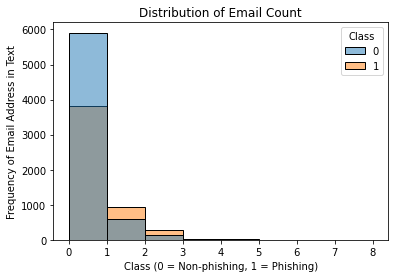

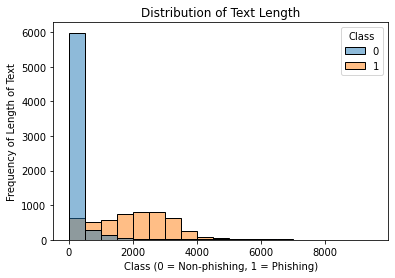

In [ ]:
#histograms
#histogram of number of url per emails for both classes 
sns.histplot(df, x="Url_Count", binwidth=1, hue="Class")
plt.title('Distribution of Url Count')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Url in Text')
plt.show()

#histogram on number of email for both classes
sns.histplot(df, x="Email_Count", binwidth=1, hue="Class")
plt.title('Distribution of Email Count')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Email Address in Text')
plt.show()

#histogram on text length per email for both classes
sns.histplot(df, x="Text_Length", binwidth=500, hue="Class")
plt.title('Distribution of Text Length')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Length of Text')
plt.show()

In [ ]:
#Removing stop words part 1: Tokenising the text (This code portion takes a while to run)
import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

start = time.time()
end = time.time()
df['Text_Tokens'] = df["Text"].apply(lambda x: word_tokenize(x))
print(end - start)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
2.86102294921875e-05


,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,..."
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]"
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next..."
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1,3333,"[mr, cheung, puihang, seng, bank, ltddes, voeux, rd, branchcentral, hong, konghong, kong, let, me, start, by, introducing, myself, i, am, mrcheung, pui, director, of, operations, of, the, hang, seng, bank, ltd, i, have, an, urgent, business, suggestion, for, youi, honestly, apologize, and, hope, i, do, not, cause, you, much, embarrassment, by, contacting, you, through, this, means, for, a, transaction, of, this, magnitudebut, this, is, due, to, confidentiality, and, prompt, access, reposed, ..."
4,not a surprising assessment from embassy,0,[],0,[],0,40,"[not, a, surprising, assessment, from, embassy]"


In [ ]:
#Removing stop words part 2: Removing stopwords
def remove_stop_words(word_tokens):
  nltk_stop_words = stopwords.words('english')
  custom_stop_words=['.', ',']
  combined_stop_words = nltk_stop_words + custom_stop_words

  filtered_sentence = []
  for w in word_tokens:
    if w not in combined_stop_words:
        filtered_sentence.append(w)
  return(filtered_sentence)
start = time.time()
df['Text_Filtered'] = df['Text_Tokens'].apply(lambda x: remove_stop_words(x))
end = time.time()
print(end - start)
df.head()

10.2901132106781


,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit..."
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]"
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, us, executor, wills, possible, may, tempted, make, fortune, clients, situations, help, left, better, option, issue, presenting, case, client, willed, fortune, nextofkin, unfortunate, nextofkin, died, day, st, october, egyptian, airline, passengers, board, confirm, website, published, bbc, world, newswebsitehttpewsbbccoukhiworldamericasstmi, faced, confusion, pass, fortune, toaccording, english, law, fortune, suppos..."
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1,3333,"[mr, cheung, puihang, seng, bank, ltddes, voeux, rd, branchcentral, hong, konghong, kong, let, me, start, by, introducing, myself, i, am, mrcheung, pui, d

In [ ]:
#Lemmatize the list of words
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wnl = WordNetLemmatizer()

def lemmatize(s):
     s = [wnl.lemmatize(word) for word in s]
     return s

df['Text_Filtered_Lemmatized'] = df['Text_Filtered'].apply(lambda x: lemmatize(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered,Text_Filtered_Lemmatized
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit...","[supply, quality, china, exclusive, dimension, unbeatable, pricedear, sir, pleased, inform, one, china, largest, export, import, stone, companywanlistone, group, group, subsidiary, specialize, quarrying, processing, sale, dimension, stone, slab, tile, dimension, stone, product, building, material, sector, specialty, marketse, group, operation, based, xiamen, south, china, largest, export, import, business, portal, china, wanlistone, owns, operates, various, natural, stone, deposit, square, m..."
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]","[sidlet, know, thx]"
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, us, executor, wills, possible, may, tempted, make, fortune, clients, situations, help, left, better, option, issue, presenting, case, client, willed, fortune, nextofkin, unfortunate, nextofkin, died, day, st, october, egyptian, airline, passengers, board, confirm, website, published, bbc, world, newswebsitehttpewsbbccoukhiworldamericasstmi, faced, confusion, pass, fortune, toaccording, english, law, fortune, suppos...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, u, executor, will, possible, may, tempted, make, fortune, client, situation, help, left, better, opt

## EMAIL TEXT MODELING & ANALYSIS

In [ ]:
#Analysing the word counts for emails in general
from sklearn.feature_extraction.text import CountVectorizer

#Join the word tokens into strings
df['Text_Filtered_String'] = df['Text_Filtered_Lemmatized'].apply(lambda x: ' '.join(x))

cvec = CountVectorizer(min_df=.0025, max_df=.1)
cvec.fit(df["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==1]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
total_counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Total_Occurrences': occ})
total_counts_df.sort_values(by=['Total_Occurrences'], ascending = False,inplace=True)
total_counts_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Total_Occurrences
1114,father,2538
764,de,1943
811,deposit,1894
95,africa,1781
1180,foreigner,1769


In [ ]:
#Analysing the word counts for phishing emails using count vectorizer
cvec = CountVectorizer(min_df=.0025, max_df=.1)
cvec.fit(df[df["Class"]==1]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==1]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
phishing_counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Phish_Occurrences': occ})
phishing_counts_df.sort_values(by=['Phish_Occurrences'], ascending = False,inplace=True)
phishing_counts_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Phish_Occurrences
1133,de,1943
830,client,1054
620,box,922
416,attorney,857
1731,firm,835


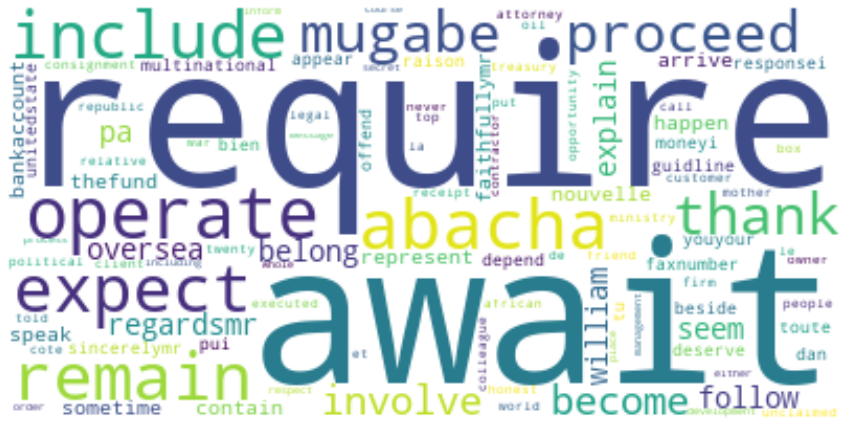

In [ ]:
#Creating a word cloud to visualise the term distribution for Phishing emails (Count Vectorizer)
from wordcloud import WordCloud
phishing_corpus = ''
for i in phishing_counts_df['Term']:
  phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Finding emails with "de" in it
df["Temporary_Column"] = df['Text_Filtered_String'].apply(lambda x: re.findall('\sde\s',x))
print(df.sort_values('Temporary_Column',ascending=False).head(10))
df.drop(columns = 'Temporary_Column',inplace = True)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Text  \
1735   rci mon ange brmon nom est mona khalil je suis de brnationalite algerienne et je vis en irak je suis une femmeeeje suis ala recherche dune personne capable de maimer et de vivre avec moievraiment une amitie basee sur le respect mutuelle et une confiancetotalecar une vie de couple sans le respect et la confiance ne nulle parteje suis une femme independante et tendreeppnbsptout ce que je voulais obtenirde ma carriere est atteinte maintenant je veux le calme la chaleur et la consta

In [ ]:
#Analysing the word counts for phishing emails using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = TfidfVectorizer()
cvec.fit(df[df["Class"]==1]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==1]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
phishing_counts_df_idf = pd.DataFrame({'Term': cvec.get_feature_names(), 'Phish_Occurrences': occ})

# TFIDF WEIGHT
phishing_counts_df_idf.sort_values(by=['Phish_Occurrences'], ascending = False,inplace=True)
phishing_counts_df_idf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Phish_Occurrences
39125,money,199.907183
6870,bank,190.622113
693,account,183.546697
26085,fund,162.706706
41773,next,117.201325


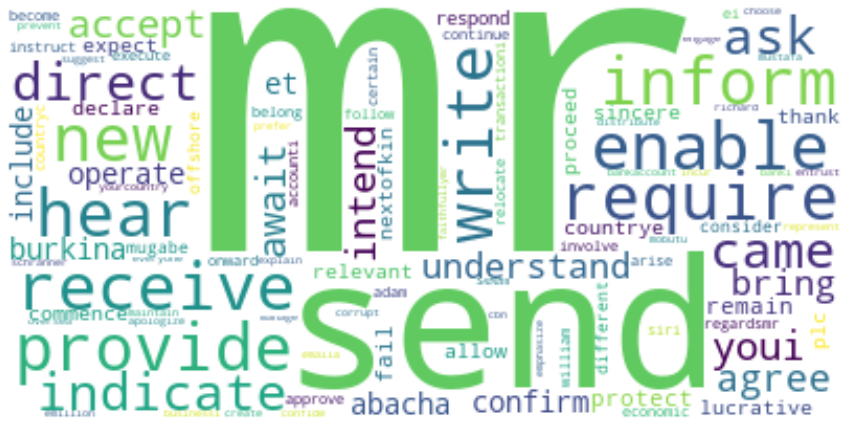

In [ ]:
#Creating a word cloud to visualise the term distribution for Phishing emails (Tfidf Vectorizer)
phishing_corpus = ''
for i in phishing_counts_df_idf['Term']:
  phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Analysing the word counts for non-phishing emails using count vectorizer
cvec = CountVectorizer(min_df=.0025, max_df=.1)
cvec.fit(df[df["Class"]==0]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==0]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Occurrences': occ})
counts_df.sort_values(by=['Occurrences'], ascending = False,inplace=True)
counts_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Occurrences
1045,pm,1691
1338,state,1202
1237,secretary,1107
957,office,928
1571,would,916


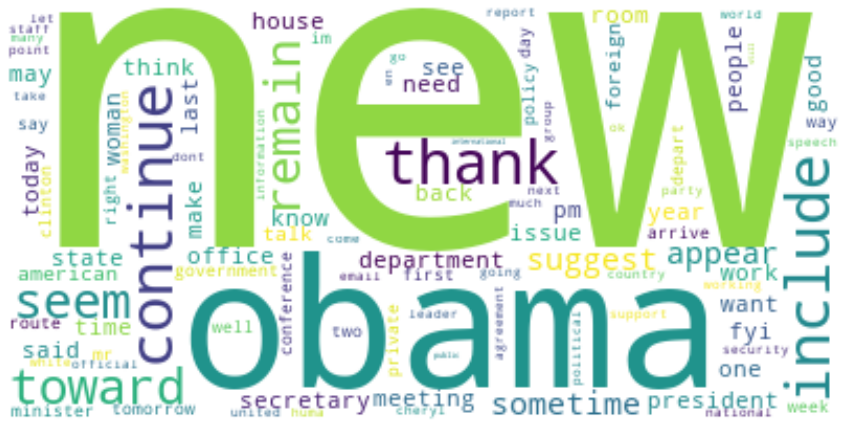

In [ ]:
#Creating a word cloud to visual the term distribution for non-phishing emails
non_phishing_corpus = ''
for i in counts_df['Term']:
  non_phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(non_phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Analysing the word counts for non-phishing emails using tfidf vectorizer
cvec = TfidfVectorizer()
cvec.fit(df[df["Class"]==1]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==0]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df_idf = pd.DataFrame({'Term': cvec.get_feature_names(), 'Phish_Occurrences': occ})

# TFIDF WEIGHT
counts_df_idf.sort_values(by=['Phish_Occurrences'], ascending = False,inplace=True)
counts_df_idf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Phish_Occurrences
10992,call,212.985684
43901,ok,206.209983
47057,pm,139.308637
60352,tomorrow,136.498073
53254,see,123.139936


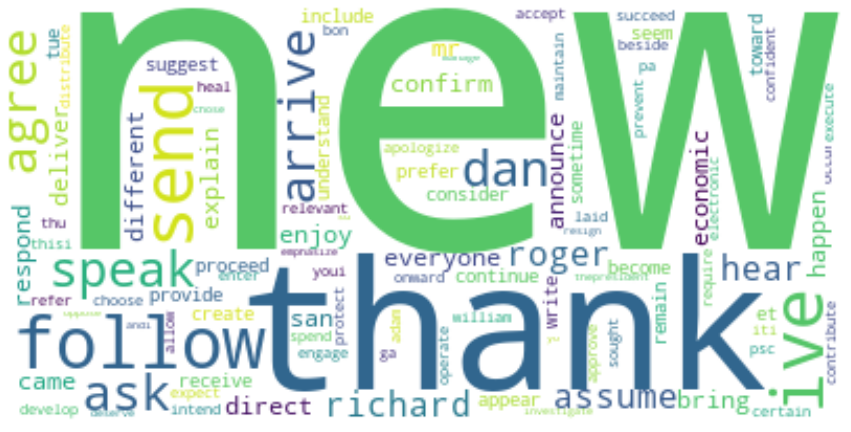

In [ ]:
#Creating a word cloud to visual the term distribution for non-phishing emails
non_phishing_corpus = ''
for i in counts_df_idf['Term']:
  non_phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(non_phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df['Url_Present'] = df["Url_Count"].apply(lambda x: 1 if x>0 else 0)

In [ ]:
#Split dataset to test and train data

from sklearn.model_selection import train_test_split
X = df["Text_Filtered_String"]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

accuracy: 97.0%
precision: 95.0%
recall: 97.0%
f1_score: 96.0%


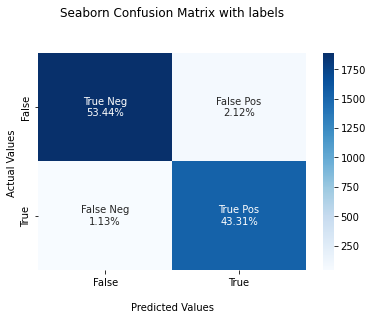

In [ ]:
#Model 1 - Multinomial Naive Bayes (With TfidfVectorizer)
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()
X_train_idf = vectorizer.fit_transform(X_train)
nb = MultinomialNB()
nb.fit(X_train_idf,y_train)
X_test_idf = vectorizer.transform(X_test)
y_pred = nb.predict(X_test_idf)

metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

In [ ]:
# Model 1 - Get the feature importance of Model 1 
# https://stackoverflow.com/questions/29867367/sklearn-multinomial-nb-most-informative-features

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

show_most_informative_features(vectorizer, nb, n=20)

	-11.6204	aab            		-6.3961	money          
	-11.6204	aabureau       		-6.4780	bank           
	-11.6204	aardiancouk    		-6.5018	account        
	-11.6204	aardo          		-6.5855	fund           
	-11.6204	aaronovitchon  		-6.9998	business       
	-11.6204	aback          		-7.0525	transaction    
	-11.6204	abackbencher   		-7.0702	country        
	-11.6204	abandonedi     		-7.0896	next           
	-11.6204	abandoning     		-7.0980	kin            
	-11.6204	abang          		-7.1116	transfer       
	-11.6204	abbot          		-7.1372	company        
	-11.6204	abbreviated    		-7.1732	million        
	-11.6204	abc            		-7.2089	contact        
	-11.6204	abclelrahman   		-7.2208	foreign        
	-11.6204	abdallah       		-7.2955	father         
	-11.6204	abdelfateh     		-7.3106	sum            
	-11.6204	abdominalpains 		-7.3251	name           
	-11.6204	abdulrahman    		-7.3531	security       
	-11.6204	abedin         		-7.3779	want           
	-11.6204	abedincherylmillsdavi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


accuracy: 96.0%
precision: 100.0%
recall: 92.0%
f1_score: 96.0%


Text(0, 0.5, 'Coefficient Value')

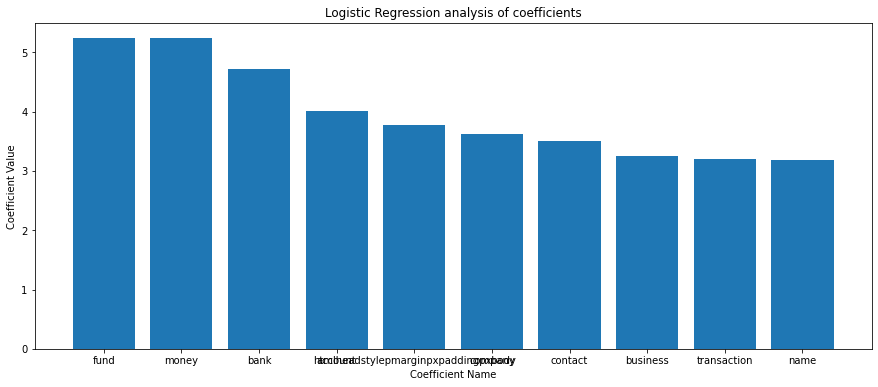

In [ ]:
#Model 2 - Logistic regression
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
lr = LogisticRegression().fit(X_train_idf, y_train)
y_pred = lr.predict(X_test_idf)
metrics(y_test, y_pred)
lr_df = pd.DataFrame(lr.coef_,columns=vectorizer.get_feature_names_out())
lr_df.sort_values(by = 0, axis=1, ascending = False,inplace=True)
figure(figsize = (15, 6))
plt.bar(list(lr_df.columns[0:10]),lr_df.iloc[0,0:10])
plt.title('Logistic Regression analysis of coefficients')
plt.xlabel('Coefficient Name')
plt.ylabel('Coefficient Value')

accuracy: 96.0%
precision: 100.0%
recall: 92.0%
f1_score: 96.0%


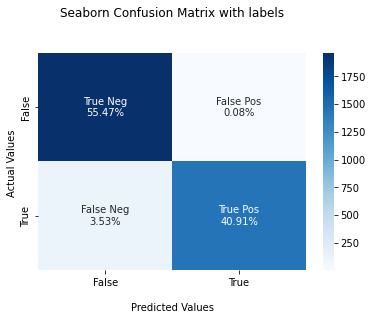

In [ ]:
#Logistic regression continue
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

accuracy: 98.0%
precision: 100.0%
recall: 96.0%
f1_score: 98.0%


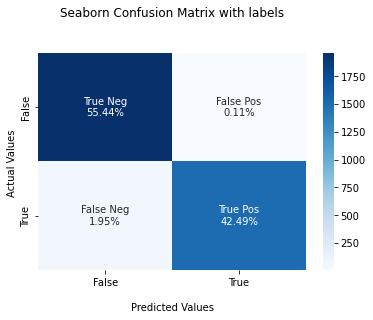

In [ ]:
#Model 3 - SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_idf, y_train)
y_pred = clf.predict(X_test_idf)
y_pred_model_svm = clf.predict(X_test_idf)
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1965
           1       1.00      0.96      0.98      1572

    accuracy                           0.98      3537
   macro avg       0.98      0.98      0.98      3537
weighted avg       0.98      0.98      0.98      3537



accuracy: 96.0%
precision: 96.0%
recall: 94.0%
f1_score: 95.0%


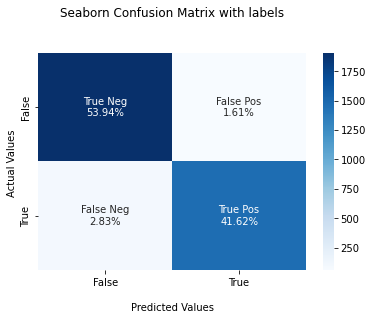

In [ ]:
#Model 4 - Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_idf,y_train)
y_pred = dt.predict(X_test_idf)
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Text(0, 0.5, 'Feature Importance')

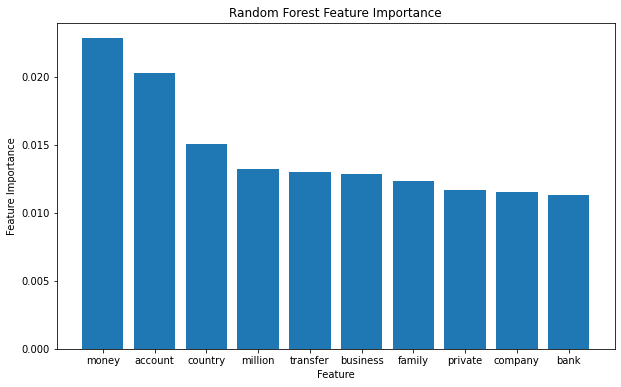

In [ ]:
#Model 5 - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=100, random_state=0)
rf.fit(X_train_idf, y_train)
y_pred = rf.predict(X_test_idf)
print(rf.get_params())

rf_df = pd.DataFrame(rf.feature_importances_,vectorizer.get_feature_names_out(),columns = ['Word'])
rf_df.sort_values(by='Word',inplace=True, ascending=False)
rf_df.head()
figure(figsize = (10, 6))
plt.bar(rf_df.index[0:10],rf_df['Word'][0:10])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')

accuracy: 96.0%
precision: 99.0%
recall: 91.0%
f1_score: 95.0%


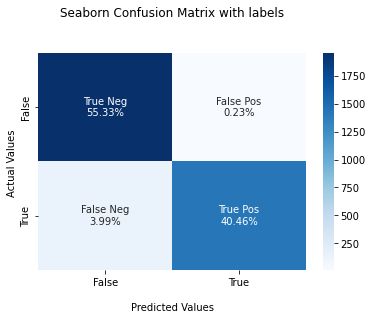

In [ ]:
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=100, random_state=0)>

In [ ]:
# #Model 6 - Random Forest with parameter tuning ()
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# # Minimum number of samples required to split a node
# min_samples_split = [10,50, 100, 300,500]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [10,50, 100,300,500]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# rf = RandomForestClassifier(random_state=0)             
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=10, random_state=0, n_jobs = -1)
# start = time.time()
# rf_random.fit(X_train_idf, y_train)
# end = time.time()
# print(end - start)

In [ ]:
# #Model 6 - Continue
# print(rf_random.best_params_)
# y_pred = rf_random.best_estimator_.predict(X_test_idf)
# print('accuracy: %s' % accuracy_score(y_test, y_pred))
# print('\n')
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [70,80, 90, 100],
#     'max_features': ['auto'],
#     'min_samples_leaf': [10, 11, 12],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [200, 267, 300, 330]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# start = time.time()
# rf_grid.fit(X_train_idf,y_train)
# end = time.time()
# print(end - start)

In [ ]:
# rf_grid.best_params_

In [ ]:
# y_pred = rf_grid.best_estimator_.predict(X_test_idf)
# print('accuracy: %s' % accuracy_score(y_test, y_pred))
# print('\n')
# print(classification_report(y_test, y_pred))

In [ ]:
#Save rf model in a file to prevent running the codes again
# import pickle
# with open('model_pkl', 'wb') as files:
#   pickle.dump(rf_grid.best_estimator_, files)

# with open('model_pkl' , 'rb') as f:
#     rf_grid_best = pickle.load(f)

accuracy: 95.0%
precision: 99.0%
recall: 89.0%
f1_score: 94.0%


Text(0, 0.5, 'Feature Importance')

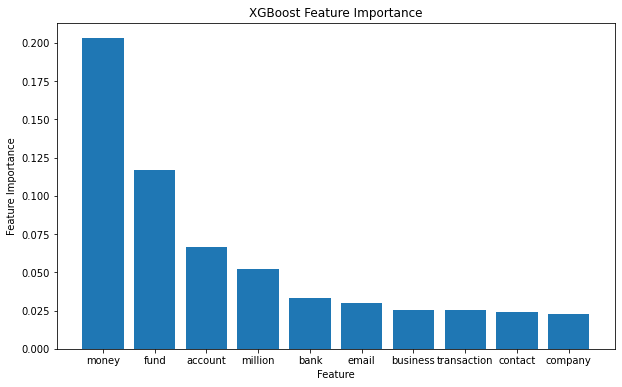

In [ ]:
#Model 7 - XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_idf, y_train)
y_pred = xg.predict(X_test_idf)
metrics(y_test,y_pred)
xg_df = pd.DataFrame(xg.feature_importances_,vectorizer.get_feature_names_out(),columns = ['Word'])
xg_df.sort_values(by='Word',inplace=True, ascending=False)
figure(figsize = (10, 6))
plt.bar(xg_df.index[0:10],xg_df['Word'][0:10])
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')

In [ ]:
# X_train_idf, y_train, X_test_idf, y_test

In [ ]:
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered,Text_Filtered_Lemmatized,Text_Filtered_String,Url_Present
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit...","[supply, quality, china, exclusive, dimension, unbeatable, pricedear, sir, pleased, inform, one, china, largest, export, import, stone, companywanlistone, group, group, subsidiary, specialize, quarrying, processing, sale, dimension, stone, slab, tile, dimension, stone, product, building, material, sector, specialty, marketse, group, operation, based, xiamen, south, china, largest, export, import, business, portal, china, wanlistone, owns, operates, various, natural, stone, deposit, square, m...",supply quality china exclusive dimension unbeatable pricedear sir pleased inform one china largest export import stone companywanlistone group group subsidiary specialize quarrying processing sale dimension stone slab tile dimension stone product building material sector specialty marketse group operation based xiamen south china largest export import business portal china wanlistone owns operates various natural stone deposit square meter country addition quarry wanlistone fully automated p...,0
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]","[sidlet, know, thx]",sidlet know thx,0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, us, executor, wills, possible, may, tempted, make

In [ ]:
traintextlist = []
trainclasslist = []
testtextlist = []
testclasslist = []
i = 0

for index, row in df.iterrows():
  # split 30%
    if i < len(df)*0.7:
        traintextlist.append(row['Text'])
        trainclasslist.append(row['Class'])
    else:
        testtextlist.append(row['Text'])
        testclasslist.append(row['Class'])
    i += 1
    
print(len(traintextlist), len(testtextlist))

8251 3536


In [ ]:
print(len(traintextlist), len(trainclasslist))
print(len(testtextlist), len(testclasslist))

8251 8251
3536 3536


In [ ]:
pip install wandb

     |████████████████████████████████| 1.8 MB 12.1 MB/s 
     |████████████████████████████████| 144 kB 47.4 MB/s 
     |████████████████████████████████| 181 kB 51.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=b11969d3add361a977497985afd3d321713204aed27b64be97714a90e4a7cbbd
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D
import numpy as np
from keras.preprocessing import text
import wandb
from wandb.keras import WandbCallback

wandb.init()
config = wandb.config
# API_key = 119555c0966edb98c12a2d82e1229a61fc4ba72e

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
config.vocab_size = 2000
config.maxlen = 1000
config.batch_size = 200
config.embedding_dims = 10
config.filters = 16
config.kernel_size = 3
config.hidden_dims = 250
config.epochs = 30

In [ ]:
text.Tokenizer

keras_preprocessing.text.Tokenizer

In [ ]:
tokenizer = text.Tokenizer(num_words = config.vocab_size)
tokenizer.fit_on_texts(traintextlist)
X_train = tokenizer.texts_to_matrix(traintextlist)
X_test = tokenizer.texts_to_matrix(testtextlist)
print(len(X_train), len(X_test))

8251 3536


In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen = config.maxlen) # fill in empty spaces if dun have least maxlen words
X_test = sequence.pad_sequences(X_test, maxlen = config.maxlen) 
print(len(X_train), len(X_test))

8251 3536


In [ ]:
y_train = np.array(trainclasslist)
y_test = np.array(testclasslist)
print(len(y_train), len(y_test))

8251 3536


In [ ]:
model = Sequential()
model.add(Embedding(config.vocab_size, config.embedding_dims, input_length = config.maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(config.filters, config.kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(config.filters, config.kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # class 1 or 0

model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
         callbacks = [WandbCallback()])

Epoch 1/30
42/42 [==============================] - 20s 49ms/step - loss: 0.6882 - accuracy: 0.5593 - val_loss: 0.6886 - val_accuracy: 0.5713 - _timestamp: 1651494605.0000 - _runtime: 42.0000
Epoch 2/30
42/42 [==============================] - 1s 28ms/step - loss: 0.6856 - accuracy: 0.5645 - val_loss: 0.6862 - val_accuracy: 0.5713 - _timestamp: 1651494606.0000 - _runtime: 43.0000
Epoch 3/30
42/42 [==============================] - 1s 26ms/step - loss: 0.6839 - accuracy: 0.5645 - val_loss: 0.6850 - val_accuracy: 0.5713 - _timestamp: 1651494607.0000 - _runtime: 44.0000
Epoch 4/30
42/42 [==============================] - 1s 29ms/step - loss: 0.6474 - accuracy: 0.6322 - val_loss: 0.5233 - val_accuracy: 0.7969 - _timestamp: 1651494609.0000 - _runtime: 46.0000
Epoch 5/30
42/42 [==============================] - 1s 33ms/step - loss: 0.4420 - accuracy: 0.8470 - val_loss: 0.4042 - val_accuracy: 0.8648 - _timestamp: 1651494610.0000 - _runtime: 47.0000
Epoch 6/30
42/42 [==========================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 10)          20000     
                                                                 
 dropout (Dropout)           (None, 1000, 10)          0         
                                                                 
 conv1d (Conv1D)             (None, 998, 16)           496       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 16)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 16)           784       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 248, 16)          0         
 1D)                                                    

## SENTIMENT ANALYSIS

In [ ]:
#TextBlob Sentiment Analysis
from textblob import TextBlob

def blob_polarity(text):
    return TextBlob(text).sentiment.polarity

def blob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
#Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
#Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
from textblob import TextBlob

df['polarity'] = df['Text'].apply(blob_polarity)
df['subjectivity'] = df['Text'].apply(blob_subjectivity)
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered,Text_Filtered_Lemmatized,Text_Filtered_String,Url_Present,polarity,subjectivity
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit...","[supply, quality, china, exclusive, dimension, unbeatable, pricedear, sir, pleased, inform, one, china, largest, export, import, stone, companywanlistone, group, group, subsidiary, specialize, quarrying, processing, sale, dimension, stone, slab, tile, dimension, stone, product, building, material, sector, specialty, marketse, group, operation, based, xiamen, south, china, largest, export, import, business, portal, china, wanlistone, owns, operates, various, natural, stone, deposit, square, m...",supply quality china exclusive dimension unbeatable pricedear sir pleased inform one china largest export import stone companywanlistone group group subsidiary specialize quarrying processing sale dimension stone slab tile dimension stone product building material sector specialty marketse group operation based xiamen south china largest export import business portal china wanlistone owns operates various natural stone deposit square meter country addition quarry wanlistone fully automated p...,0,0.095688,0.413170
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]","[sidlet, know, thx]",sidlet know thx,0,0.000000,0.000000
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, 

In [ ]:
polarity_df=df[['Text','polarity','Class']]
polarity_df.head()

,Text,polarity,Class
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,0.095688,1
1,over sidlet me know thx,0.000000,0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,0.062850,1
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,0.131071,1
4,not a surprising assessment from embassy,-0.350000,0


In [ ]:
sorted_polarity = polarity_df.sort_values(by=['polarity'], ascending=True)
sorted_polarity.head()

,Text,polarity,Class
5541,i am counting on you looking to hearing from youthanks and god bless youmrs fadilah fahad \t\t\t yahoo mail use photomail to share photos without annoying attachments,-0.800,1
2327,thx you should get a copy of alis data base for our use,-0.800,0
5584,im in bad cell area,-0.700,0
10552,h hrodclintonemailcommonday april pmabedinhstategov jilotylcstategov russorvstategovre bad newspis send a letter and add her to call list i called yesterday and spoke w her soninlaw,-0.700,0
1278,boy are they mad about our ambassador,-0.625,0


In [ ]:
sorted_polarity = polarity_df.sort_values(by=['polarity'], ascending=False)
sorted_polarity.head(10)

,Text,polarity,Class
11034,i hope all the clintons had a wonderful xmasdb,1.0,0
57,best regards ron sinclear ronsinclearnetscapenet,1.0,1
4725,briefed a group of wonks at brookings tonite superbly impressive persuasive lowkey mastery confidencecongrats on having her on your team leading these negs,1.0,0
1478,best regardsjoseph aburime bcaeffccedea,1.0,1
4009,can you talk what time is best,1.0,0
9025,here is the best spelling ive seen of our qatari friends namesheikha mozah bint nasser almissned,1.0,0
6188,dont forget the consolidated report of the sarkozy mtg one of the alltime best,1.0,0
7053,best regardsdrdaniel ibecivil servantfederal ministry ofpetroleum and mineralresources,1.0,1
9839,release inpart bi spoke with laura yesterday re folks you mentioned her is person she ans jose thought best,1.0,0
11538,best regards ron sinclear ronsinclearnetscapenet,1.0,1


In [ ]:
subjectivity_df=df[['Text','subjectivity','Class']]
subjectivity_df.head()

,Text,subjectivity,Class
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,0.413170,1
1,over sidlet me know thx,0.000000,0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,0.367444,1
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,0.445476,1
4,not a surprising assessment from embassy,0.500000,0


In [ ]:
sorted_subjectivity = subjectivity_df.sort_values(by=['subjectivity'], ascending=True)
sorted_subjectivity.head(10)

,Text,subjectivity,Class
3469,yes thats the plan,0.0,0
8223,h hrodclintonemailcomsunday january amhuma abedinsullivanjjstategovre yang,0.0,0
3851,htmlheadstylepmarginpxpaddingpxbody,0.0,1
3850,allsee below for appreciation for all your efforts congrats and thanksplease pass along to whomever i missedcdm,0.0,0
3849,vujveveiebvelptlmgtjhqujwkfusuockloienptkpvtknusuoifdjveggvehfielovevstkfusuoquwgtuorvrbulkgrlvorapxtjmrcbcquliezbqqtrkloreloryamifnqrunjquwgrfvusuvtiegrkldrqpequtbuiwguvorudbtckvevmoiagkziymsamtgzmzeckvtywlsoibyzxzkbvnbgfzqgthdgftywlslmnvbqokubfqlbtcbevvrjrvmgukvgrvjftknfcgoqklvotyxqkygtetmdutmzcxkiokkippukrfuklorybdtuukfdvesogpesvbmtbveldiejpwcanuthcgpezwfyiejlbmvmawnpyxjlaokssbhbsbszxyuiezylibuagtyxmgrgzxhcywgysbzzwpbigcrhzmygdlacbagugvybgqgqmfuaybmywnigzpbmrpbmcgjibzcgvjawfsigrdgllcybvzm...,0.0,1
3848,anything else going on,0.0,0
3846,ckfzcfsywywxhawtbqoktxkgbmftzsbpcybbbwluysbiywuywggsgfbgvizxjnigzybgqwlcmljysgssbhbsbagugcvydmlawnckrhdwdodgvyigmierylibhbmqgtxjziehhdgxlymvyzybaggzgllzcbhcybhihjlcvsdcbvzibwbgfuzsbjcmfzacbvziakqwxhcthiefpcmxpbmvziezsawdodcaynjegdhpyggyjhchlzcbvbibkywyxjidmxidiwmdauieigzhbwlseqpjbzxjzwqgdggsxnsywgawgmtkocgvhlbibtesbsyxrlifbhcmvudcbzxjligfsaxzllcbtesbmyxrozxikzgvwbnpdgvkihrozsbzdwgbykociepbgxpbgkgvpzhigpbgxpbgzmlzsbodwkcmvkihrobvzywkcluuuygrgsbgfycykgdlacbjbnrlcmhdglvbmfsierpcgxvbwfawmgcvydml...,0.0,1
11048,i think we have to mentionb,0.0,0
11051,anticipating to hear from you soonthanks and god bless youbest regardsmrshilda tomson,0.0,1
8226,can i see mitchell at instead of also what happened to mccrystal mtg,0.0,0


In [ ]:
sorted_subjectivity = subjectivity_df.sort_values(by=['subjectivity','Class'], ascending=[False,False])

sorted_subjectivity.head(10)

,Text,subjectivity,Class
896,republique de cote divoireabidjanrue ave plateautres chercette lettre va sfbrement vous paraeetre surprenante je vous prie neanmoin de bien vouloir luiaccorder un grand intereat et de la prendre au serieux avant tout permettez nous de nous presenter aupres de vous je me nomme miss halija amed et jai ansjai perdu mes parents depuis le debut de la guerre que connait notre pays engendre par des rebelleset depuis nous traversons une periode assez difficilemon pere a ete tue dans cette sale guer...,1.0,1
1001,this message contains confidential information and is intended only forspecified addressee if you are not the named addressee you should not disseminatedistribute or copy this email the sender therefore does not accept liabilityfor any errors or omissions in the contents of this message which ariseas a result of email transmission please note that we reserve the rightto monitor and read any emails sent and received under the telecommunicationslawful business practice interception of communic...,1.0,1
2311,committees representative whose name appears below we wait in anticipation of your fullest cooperationyours faithfullyben maluleke engrdepartment of minerals and energyrepublic of south africaget the ultimate realtime chat experience msn messenger httpmessengermsncoza,1.0,1
2664,ahoocamimimegyahoocaaa hrefdmailtomimimegyahoocaadiv divnbspdiv divnbspdiv divnbspdiv divnbspdivdivdivdivpbrdo you yahoobren finir avec le spam yahoo courriel vous offre la meilleure protection possible contre les messages non nollicites brhttpmailyahooca yahoo courriel,1.0,1
4141,finally accept my goodwill my dear friend thank you once again and may god bless you mraku ubah,1.0,1
4358,this message contains confidential information and is intended only forspecified addressee if you are not the named addressee you should not disseminatedistribute or copy this email the sender therefore does not accept liabilityfor any errors or omissions in the contents of this message which ariseas a result of email transmission please note that we reserve the rightto monitor and read any emails sent and received under the telecommunicationslawful business practice interception of communic...,1.0,1
5558,committees representative whose name appears below we wait in anticipation of your fullest cooperationyours faithfullyben maluleke engrdepartment of minerals and energyrepublic of south africaget the ultimate realtime chat experience msn messenger httpmessengermsncoza,1.0,1
5936,divdivprepublique de cote divoirebrabidjanrue ave brplateaubrtres cherbrcette lettre va sfbrement vous paraeetre surprenante je vous prie brneanmoin de bien vouloir luibraccorder un grand intereat et de la prendre au serieux avant tout brpermettez nous de nous presenter aupres de vous je me nomme miss halija bramed et jai ansjai perdu mes parents depuis le debut de la guerre brque connait notre pays engendre par des rebelleset depuis nous traversons brune periode assez difficilebrmon pere a...,1.0,1
6793,happy dayi am mr peter anika a staff of the finance ministryinliberiaplease if you have contactin your country or a safeaccommodation for atotal sum of $ million incashkindly reach me through my email addressyour progress response will enable me disclose thenature of the dealand my terms note that i would want you to maintain the spiritofhonestytransparency,1.0,1
6986,do you yahooen finir avec le spam yahoo courriel vous offre la meilleure protection possible contre les messages non nolliciteshttpmailyahooca yahoo courriel,1.0,1


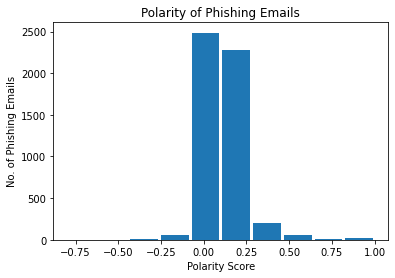

In [ ]:
#Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
plt.hist(df[df['Class']==1]['polarity'], rwidth=0.9)
plt.title('Polarity of Phishing Emails')
plt.xlabel('Polarity Score')
plt.ylabel('No. of Phishing Emails')
plt.show()

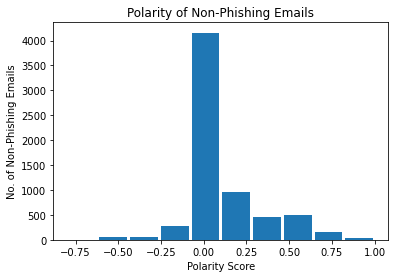

In [ ]:
plt.hist(df[df['Class']==0]['polarity'], rwidth=0.9)
plt.title('Polarity of Non-Phishing Emails')
plt.xlabel('Polarity Score')
plt.ylabel('No. of Non-Phishing Emails')
plt.show()

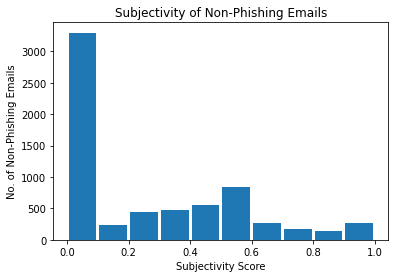

In [ ]:
#Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
plt.hist(df[df['Class']==0]['subjectivity'], rwidth=0.9)
plt.title('Subjectivity of Non-Phishing Emails')
plt.xlabel('Subjectivity Score')
plt.ylabel('No. of Non-Phishing Emails')
plt.show()

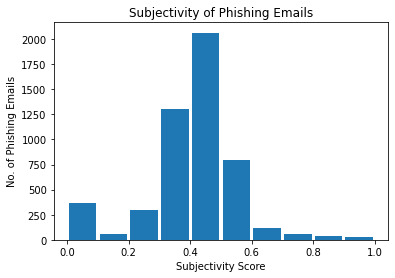

In [ ]:
plt.hist(df[df['Class']==1]['subjectivity'], rwidth=0.9)
plt.title('Subjectivity of Phishing Emails')
plt.xlabel('Subjectivity Score')
plt.ylabel('No. of Phishing Emails')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df['subjectivity']
y = df['Class']
X = np.array(X).reshape((len(X), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
#SVM
clf_sub = svm.SVC(kernel='linear')
clf_sub.fit(X_train,y_train)
y_pred = clf_sub.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7150127226463104


              precision    recall  f1-score   support

           0       0.86      0.58      0.69      1965
           1       0.63      0.88      0.73      1572

    accuracy                           0.72      3537
   macro avg       0.74      0.73      0.71      3537
weighted avg       0.76      0.72      0.71      3537



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
lr_sub = LogisticRegression().fit(X_train, y_train)
y_pred = lr_sub.predict(X_test)
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


accuracy: 0.5821317500706814


              precision    recall  f1-score   support

           0       0.61      0.71      0.65      1965
           1       0.54      0.42      0.47      1572

    accuracy                           0.58      3537
   macro avg       0.57      0.57      0.56      3537
weighted avg       0.58      0.58      0.57      3537



In [ ]:
#NB-Gaussian
from sklearn.naive_bayes import GaussianNB
nb_sub= GaussianNB().fit(X_train,y_train)
y_pred= nb_sub.predict(X_test)
y_pred_sentiment_nb = nb_sub.predict(X_test)
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7554424653661295


              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1965
           1       0.68      0.85      0.76      1572

    accuracy                           0.76      3537
   macro avg       0.77      0.76      0.76      3537
weighted avg       0.77      0.76      0.76      3537



In [ ]:
import pandas as pd

#Source https://github.com/TanusreeSharma/phishingdata-Analysis/tree/master/1st%20data
#New Phishing Email 'https://drive.google.com/file/d/1DSD32etzUkmrIVP7xykrR0N6J5tQYfsB/view?usp=sharing'
#url = 'https://docs.google.com/spreadsheets/d/1jhP5JDKVSCdFIqtQcniiLlq9dR-AU_vo/edit?usp=sharing&ouid=105143275950429665865&rtpof=true&sd=true'
url= 'https://docs.google.com/spreadsheets/d/1ut3Synmx0NEyXvgFykk3RR4Lt2yHkUwb/edit?usp=sharing&ouid=105143275950429665865&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
phish = pd.read_excel(path)
phish.head()

,text,class
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1


## URL ANALYSIS TRAINING MODELING

In [ ]:
pip install whois

  Created wheel for whois: filename=whois-0.9.13-py3-none-any.whl size=9609 sha256=04e967a80903ab34e846ad3b825bdac4da512dd45a0885ba92d645f147c495df
  Stored in directory: /root/.cache/pip/wheels/f5/85/a6/2ac688355ea1a85b0a2b9c0243012f3021333b6c65b7305d86
Successfully built whois


In [ ]:
pip install pyquery

In [ ]:
# Extracting Features Class

import whois
from datetime import datetime, timezone
import math
import pandas as pd
import numpy as np
from pyquery import PyQuery
from requests import get

class UrlFeaturizer(object):
    def __init__(self, url):
        self.url = url
        self.domain = url.split('//')[-1].split('/')[0]
        self.today = datetime.now().replace(tzinfo=None)

        try:
            self.whois = whois.query(self.domain).__dict__
        except:
            self.whois = None

        try:
            self.response = get(self.url)
            self.pq = PyQuery(self.response.text)
        except:
            self.response = None
            self.pq = None

    ## URL string Features
    def entropy(self):
        string = self.url.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return entropy

    def ip(self):
        string = self.url
        flag = False
        if ("." in string):
            elements_array = string.strip().split(".")
            if(len(elements_array) == 4):
                for i in elements_array:
                    if (i.isnumeric() and int(i)>=0 and int(i)<=255):
                        flag=True
                    else:
                        flag=False
                        break
        if flag:
            return 1 
        else:
            return 0

    def numDigits(self):
        digits = [i for i in self.url if i.isdigit()]
        return len(digits)

    def urlLength(self):
        return len(self.url)

    def numParameters(self):
        params = self.url.split('&')
        return len(params) - 1

    def numFragments(self):
        fragments = self.url.split('#')
        return len(fragments) - 1

    def numSubDomains(self):
        subdomains = self.url.split('http')[-1].split('//')[-1].split('/')
        return len(subdomains)-1

    def domainExtension(self):
        ext = self.url.split('.')[-1].split('/')[0]
        return ext

    ## URL domain features
    def hasHttp(self):
        return 'http:' in self.url

    def hasHttps(self):
        return 'https:' in self.url

    def daysSinceRegistration(self):
        if self.whois and self.whois['creation_date']:
            diff = self.today - self.whois['creation_date'].replace(tzinfo=None)
            diff = str(diff).split(' days')[0]
            return diff
        else:
            return 0

    def daysSinceExpiration(self):
        if self.whois and self.whois['expiration_date']:
            diff = self.whois['expiration_date'].replace(tzinfo=None) - self.today
            diff = str(diff).split(' days')[0]
            return diff
        else:
            return 0
    
     ## URL Page Features
    def bodyLength(self):
        if self.pq is not None:
            return len(self.pq('html').text()) if self.urlIsLive else 0
        else:
            return 0

    def numTitles(self):
        if self.pq is not None:
            titles = ['h{}'.format(i) for i in range(7)]
            titles = [self.pq(i).items() for i in titles]
            return len([item for s in titles for item in s])
        else:
            return 0

    def numImages(self):
        if self.pq is not None:
            return len([i for i in self.pq('img').items()])
        else:
            return 0

    def numLinks(self):
        if self.pq is not None:
            return len([i for i in self.pq('a').items()])
        else:
            return 0

    def scriptLength(self):
        if self.pq is not None:
            return len(self.pq('script').text())
        else:
            return 0

    def specialCharacters(self):
        if self.pq is not None:
            bodyText = self.pq('html').text()
            schars = [i for i in bodyText if not i.isdigit() and not i.isalpha()]
            return len(schars)
        else:
            return 0

    def scriptToSpecialCharsRatio(self):
        v = self.specialCharacters()
        if self.pq is not None and v!=0:
            sscr = self.scriptLength()/v
        else:
            sscr = 0
        return sscr

    def scriptTobodyRatio(self):
        v = self.bodyLength()
        if self.pq is not None and v!=0:
            sbr = self.scriptLength()/v
        else:
            sbr = 0
        return sbr

    def bodyToSpecialCharRatio(self):
        v = self.bodyLength()
        if self.pq is not None and v!=0:
            bscr = self.specialCharacters()/v
        else:
            bscr = 0
        return bscr

    def urlIsLive(self):
        return self.response == 200

    def run(self):
        data = {}
        # 22 features
        data['entropy'] = self.entropy()
        data['numDigits'] = self.numDigits()
        data['urlLength'] = self.urlLength()
        data['numParams'] = self.numParameters()
        data['hasHttp'] = self.hasHttp()
        data['hasHttps'] = self.hasHttps()
        data['urlIsLive'] = self.urlIsLive()
        data['bodyLength'] = self.bodyLength()
        data['numTitles'] = self.numTitles()
        data['numImages'] = self.numImages()
        data['numLinks'] = self.numLinks()
        data['scriptLength'] = self.scriptLength()
        data['specialChars'] = self.specialCharacters()
        data['ext'] = self.domainExtension()
        data['dsr'] = self.daysSinceRegistration()
        data['dse'] = self.daysSinceExpiration()
        data['sscr'] = self.scriptToSpecialCharsRatio()
        data['sbr'] = self.scriptTobodyRatio()
        data['bscr'] = self.bodyToSpecialCharRatio()
        data['num_%20'] = self.url.count("%20")
        data['num_@'] = self.url.count("@")
        data['has_ip'] = self.ip()
    
        return data

In [ ]:
# Phishing and non-phishing URL dataset
url= 'https://drive.google.com/file/d/1BlHR6uSNkBCN4_CRZjuuw02PzeYtgB9M/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
A = pd.read_csv(path)
A.head()

,entropy,numDigits,urlLength,numParams,hasHttp,hasHttps,urlIsLive,bodyLength,numTitles,numImages,...,ext,dsr,dse,sscr,sbr,bscr,num_%20,num_@,has_ip,Class
0,-4.282413,6,91,0,True,False,False,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,normal_url
1,-4.617991,10,70,0,True,False,False,0,0,0,...,article>august,0,0,0.000000,0.000000,0.000000,0,0,0,normal_url
2,-4.329320,6,110,0,True,False,False,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,normal_url
3,-4.706447,6,78,0,True,False,False,246796,104,90,...,htmlyour,0,0,0.535639,0.121797,0.227386,0,0,0,normal_url
4,-4.461086,0,61,0,True,False,False,246739,104,90,...,com,0,0,0.534623,0.121594,0.227439,0,0,0,normal_url


In [ ]:
A.replace(True,1,inplace = True)
A.replace(False,0,inplace = True)
A.replace("phishing_url1",1,inplace=True)
A.replace("normal_url",0,inplace=True)

In [ ]:
A

,entropy,numDigits,urlLength,numParams,hasHttp,hasHttps,urlIsLive,bodyLength,numTitles,numImages,...,ext,dsr,dse,sscr,sbr,bscr,num_%20,num_@,has_ip,Class
0,-4.282413,6,91,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,0
1,-4.617991,10,70,0,1,0,0,0,0,0,...,article>august,0,0,0.000000,0.000000,0.000000,0,0,0,0
2,-4.329320,6,110,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,0
3,-4.706447,6,78,0,1,0,0,246796,104,90,...,htmlyour,0,0,0.535639,0.121797,0.227386,0,0,0,0
4,-4.461086,0,61,0,1,0,0,246739,104,90,...,com,0,0,0.534623,0.121594,0.227439,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,-3.921030,0,26,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,1
741,-4.222794,0,48,0,1,0,0,0,0,0,...,uk,0,0,0.000000,0.000000,0.000000,0,0,0,1
742,-4.462993,10,63,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,1
743,-4.316286,0,66,1,1,0,0,0,0,0,...,<br>&nbsp;<br>we,0,0,0.000000,0.000000,0.000000,0,0,0,1


In [ ]:
#Split dataset to test and train data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = A['Class']

A = A.drop(columns = "Class")
A = A.drop(columns = "ext")

scaler = MinMaxScaler(feature_range=(0, 1))  
X = pd.DataFrame(scaler.fit_transform(A))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(np.array(X_train.columns))
print(X_train.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
RangeIndex(start=0, stop=21, step=1)


In [ ]:
# Plotting feature importance graph function
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
#Model 1 - Gaussian Naive Bayes (supports continuous data) 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

url_nb = GaussianNB()
url_nb.fit(X_train, y_train)

y_pred = url_nb.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.3705357142857143


              precision    recall  f1-score   support

           0       0.30      1.00      0.46        61
           1       1.00      0.13      0.24       163

    accuracy                           0.37       224
   macro avg       0.65      0.57      0.35       224
weighted avg       0.81      0.37      0.30       224



[ 0.          0.          0.         -0.00089286  0.05357143 -0.00178571
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00714286  0.        ]
<class 'sklearn.utils.Bunch'>


Text(0, 0.5, 'FEATURE NAMES')

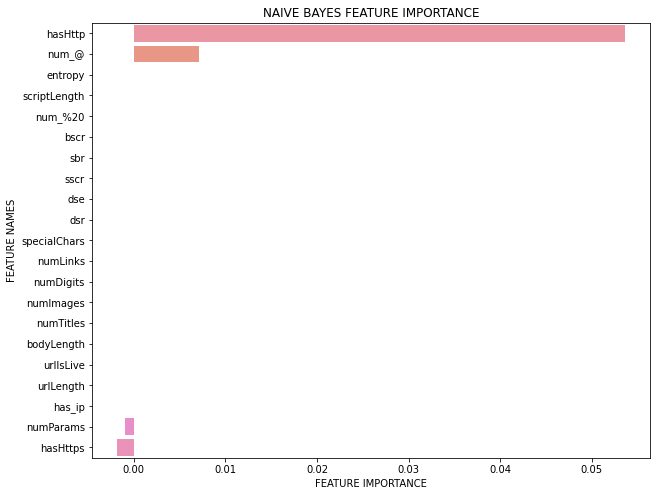

In [ ]:
# feature importance 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import permutation_importance

imps = permutation_importance(url_nb, X_test, y_test)

print(imps.importances_mean)
print(type(imps))

#Create a DataFrame using a Dictionary
data={'feature_names':A.columns,'feature_importance':imps.importances_mean}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title("NAIVE BAYES" + ' FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
#Model 2 - Logistic regression
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure

url_log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

url_log_reg.fit(X_train, y_train)

y_pred = url_log_reg.predict(X_test)

print('accuracy: %s' % accuracy_score(y_pred, y_test))
print('\n')
print(classification_report(y_test, y_pred))
type(url_log_reg.coef_)

accuracy: 0.7857142857142857


              precision    recall  f1-score   support

           0       0.84      0.26      0.40        61
           1       0.78      0.98      0.87       163

    accuracy                           0.79       224
   macro avg       0.81      0.62      0.63       224
weighted avg       0.80      0.79      0.74       224



numpy.ndarray

In [ ]:
# feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = url_log_reg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 

# plot feature importance

# plot_feature_importance(importance,A.columns,'LOGISTIC REGRESSION ')

Feature: 0, Score: 1.32610
Feature: 1, Score: -0.76645
Feature: 2, Score: 0.08679
Feature: 3, Score: 0.22003
Feature: 4, Score: -1.16350
Feature: 5, Score: 0.04275
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.17031
Feature: 8, Score: -0.01026
Feature: 9, Score: -0.24345
Feature: 10, Score: -2.00638
Feature: 11, Score: -0.30050
Feature: 12, Score: 0.37237
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.14113
Feature: 16, Score: -0.21997
Feature: 17, Score: -0.49961
Feature: 18, Score: -0.19007
Feature: 19, Score: 0.72147
Feature: 20, Score: 0.00000


In [ ]:
#Model 3 - SVM
from sklearn import svm
url_clf = svm.SVC(kernel='linear')
url_clf.fit(X_train, y_train)
y_pred = url_clf.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7366071428571429


              precision    recall  f1-score   support

           0       1.00      0.03      0.06        61
           1       0.73      1.00      0.85       163

    accuracy                           0.74       224
   macro avg       0.87      0.52      0.46       224
weighted avg       0.81      0.74      0.63       224



In [ ]:
#Model 4 - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

url_rf = RandomForestClassifier(max_depth=100, random_state=0)
url_rf.fit(X_train, y_train)
y_pred = url_rf.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8482142857142857


              precision    recall  f1-score   support

           0       0.80      0.59      0.68        61
           1       0.86      0.94      0.90       163

    accuracy                           0.85       224
   macro avg       0.83      0.77      0.79       224
weighted avg       0.84      0.85      0.84       224

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt

# get importance
importance = url_rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

# plot_feature_importance(importance,A.columns,'RANDOM FOREST ')

Feature: 0, Score: 0.24502
Feature: 1, Score: 0.13592
Feature: 2, Score: 0.22726
Feature: 3, Score: 0.01962
Feature: 4, Score: 0.00968
Feature: 5, Score: 0.00010
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05237
Feature: 8, Score: 0.03716
Feature: 9, Score: 0.01822
Feature: 10, Score: 0.06552
Feature: 11, Score: 0.02560
Feature: 12, Score: 0.05621
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.03274
Feature: 16, Score: 0.03557
Feature: 17, Score: 0.03538
Feature: 18, Score: 0.00134
Feature: 19, Score: 0.00229
Feature: 20, Score: 0.00000


In [ ]:
#Model 5 - Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
url_dt = DecisionTreeClassifier()
url_dt = url_dt.fit(X_train, y_train)
y_pred = url_dt.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7857142857142857


              precision    recall  f1-score   support

           0       0.61      0.59      0.60        61
           1       0.85      0.86      0.85       163

    accuracy                           0.79       224
   macro avg       0.73      0.72      0.73       224
weighted avg       0.78      0.79      0.78       224



In [ ]:
# feature importance on a classification problem (decision tree)
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get importance
importance = url_dt.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

# plot_feature_importance(importance,A.columns,'DECISION TREE ')

Feature: 0, Score: 0.19824
Feature: 1, Score: 0.16970
Feature: 2, Score: 0.21654
Feature: 3, Score: 0.02981
Feature: 4, Score: 0.02030
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02989
Feature: 8, Score: 0.01838
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.22245
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01491
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00526
Feature: 16, Score: 0.04726
Feature: 17, Score: 0.02052
Feature: 18, Score: 0.00675
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000


In [ ]:
#Model 6 - XGBoost
from xgboost import XGBClassifier
url_xg = XGBClassifier()
url_xg.fit(X_train, y_train)
y_pred = url_xg.predict(X_test)
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8258928571428571


              precision    recall  f1-score   support

           0       0.87      0.43      0.57        61
           1       0.82      0.98      0.89       163

    accuracy                           0.83       224
   macro avg       0.84      0.70      0.73       224
weighted avg       0.83      0.83      0.80       224



In [ ]:
# feature importance on a classification problem (xgboost)
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# get importance
importance = url_xg.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

# plot_feature_importance(importance,A.columns,'XGBOOST ')

Feature: 0, Score: 0.06084
Feature: 1, Score: 0.04508
Feature: 2, Score: 0.06554
Feature: 3, Score: 0.06427
Feature: 4, Score: 0.04848
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05859
Feature: 8, Score: 0.05576
Feature: 9, Score: 0.09094
Feature: 10, Score: 0.23147
Feature: 11, Score: 0.05428
Feature: 12, Score: 0.03001
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.03410
Feature: 16, Score: 0.09961
Feature: 17, Score: 0.03829
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.02274
Feature: 20, Score: 0.00000


Multi-layer Perceptron Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=99, max_iter=1000)

mlpclf.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), max_iter=1000,
              random_state=99, solver='lbfgs')

In [ ]:
y_pred = mlpclf.predict(X_test)

In [ ]:
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8258928571428571


              precision    recall  f1-score   support

           0       0.82      0.46      0.59        61
           1       0.83      0.96      0.89       163

    accuracy                           0.83       224
   macro avg       0.82      0.71      0.74       224
weighted avg       0.83      0.83      0.81       224



## IMPORT FOREIGN DATASET



## EMAIL TEXT TESTING ON NEW DATASET

In [ ]:
phish_test = vectorizer.transform(phish['text'])
target = phish['class']

In [ ]:
#Using Model 1 (Naive bayes) to predict the new dataset
y_pred_nb = nb.predict(phish_test)

print('accuracy: %s' % accuracy_score(target, y_pred_nb))



accuracy: 0.6578341013824884


In [ ]:
#Using Model 2 (Logistic regression) to predict the new dataset
y_pred_lr = lr.predict(phish_test)
print('accuracy: %s' % accuracy_score(target, y_pred_lr))
print('\n')
print(classification_report(target, y_pred_lr))

accuracy: 0.6059907834101382


              precision    recall  f1-score   support

           0       0.57      0.99      0.72       450
           1       0.94      0.19      0.32       418

    accuracy                           0.61       868
   macro avg       0.76      0.59      0.52       868
weighted avg       0.75      0.61      0.53       868



In [ ]:
#Using Model 3 SVM to predict the new dataset
y_pred_svm = clf.predict(phish_test)

print('accuracy: %s' % accuracy_score(target, y_pred_svm))
print('\n')
print(classification_report(target, y_pred_svm))

accuracy: 0.6474654377880185


              precision    recall  f1-score   support

           0       0.60      0.95      0.74       450
           1       0.86      0.32      0.47       418

    accuracy                           0.65       868
   macro avg       0.73      0.64      0.60       868
weighted avg       0.73      0.65      0.61       868



In [ ]:
#Using Model 5 Random Forest to predict the new dataset
y_pred = rf.predict(phish_test)

print('accuracy: %s' % accuracy_score(target, y_pred))
print('\n')
print(classification_report(target, y_pred))

accuracy: 0.5138248847926268


              precision    recall  f1-score   support

           0       0.52      0.92      0.66       450
           1       0.47      0.08      0.14       418

    accuracy                           0.51       868
   macro avg       0.49      0.50      0.40       868
weighted avg       0.50      0.51      0.41       868



In [ ]:
#Using Model 6 Random Forest (Parameter Tuned) to predict the new dataset
# y_pred  = rf_random.best_estimator_.predict(phish_test)

# print('accuracy: %s' % accuracy_score(target, y_pred))
# print('\n')
# print(classification_report(target, y_pred))

In [ ]:
#Using Model 6.5 Random Forest (Parameter Tuned) to predict the new dataset
# y_pred  = rf_grid_best.predict(phish_test)

# print('accuracy: %s' % accuracy_score(target, y_pred))
# print('\n')
# print(classification_report(target, y_pred))

In [ ]:
#Using Model 7 xGboost to predict the new dataset
y_pred = xg.predict(phish_test)
print('accuracy: %s' % accuracy_score(target, y_pred))
print('\n')
print(classification_report(target, y_pred))

accuracy: 0.5172811059907834


              precision    recall  f1-score   support

           0       0.52      0.86      0.65       450
           1       0.50      0.15      0.23       418

    accuracy                           0.52       868
   macro avg       0.51      0.50      0.44       868
weighted avg       0.51      0.52      0.45       868



In [ ]:
phish.head()

,text,class
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1


In [ ]:
traintextlist = []
trainclasslist = []
testtextlist = []
testclasslist = []
i = 0

for index, row in phish.iterrows():
  # split 30%
    if i < len(phish)*0.7:
        traintextlist.append(row['text'])
        trainclasslist.append(row['class'])
    else:
        testtextlist.append(row['text'])
        testclasslist.append(row['class'])
    i += 1
    
print(len(traintextlist), len(testtextlist))

608 260


In [ ]:
tokenizer = text.Tokenizer(num_words = config.vocab_size)
tokenizer.fit_on_texts(traintextlist)
X_train = tokenizer.texts_to_matrix(traintextlist)
X_test = tokenizer.texts_to_matrix(testtextlist)
print(len(X_train), len(X_test))


608 260


In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen = config.maxlen) # fill in empty spaces if dun have least maxlen words
X_test = sequence.pad_sequences(X_test, maxlen = config.maxlen) 
print(len(X_train), len(X_test))


608 260


In [ ]:
y_train = np.array(trainclasslist)
y_test = np.array(testclasslist)
print(len(y_train), len(y_test))
model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
         callbacks = [WandbCallback()])

608 260
Epoch 1/30
4/4 [==============================] - 0s 113ms/step - loss: 2.6595 - accuracy: 0.5099 - val_loss: 3.3060 - val_accuracy: 0.5423 - _timestamp: 1651496081.0000 - _runtime: 1518.0000
Epoch 2/30
4/4 [==============================] - 0s 43ms/step - loss: 1.4029 - accuracy: 0.5921 - val_loss: 1.3996 - val_accuracy: 0.6885 - _timestamp: 1651496081.0000 - _runtime: 1518.0000
Epoch 3/30
4/4 [==============================] - 0s 45ms/step - loss: 0.6750 - accuracy: 0.6941 - val_loss: 0.6875 - val_accuracy: 0.6885 - _timestamp: 1651496081.0000 - _runtime: 1518.0000
Epoch 4/30
4/4 [==============================] - 0s 41ms/step - loss: 0.4740 - accuracy: 0.8207 - val_loss: 0.4844 - val_accuracy: 0.7346 - _timestamp: 1651496081.0000 - _runtime: 1518.0000
Epoch 5/30
4/4 [==============================] - 0s 43ms/step - loss: 0.3471 - accuracy: 0.8635 - val_loss: 0.4267 - val_accuracy: 0.7462 - _timestamp: 1651496081.0000 - _runtime: 1518.0000
Epoch 6/30
4/4 [====================

In [ ]:
# newX = []
# newY = []

# i = 0
# for index, row in phish.iterrows():
#     newX.append(row['text'])
#     newY.append(row['class'])
    
# print(len(newX), len(newY))

In [ ]:
# newX[:5]

In [ ]:
# newY[:5]

In [ ]:
tokenizer = text.Tokenizer(num_words = config.vocab_size)
tokenizer.fit_on_texts(newX)
newX = tokenizer.texts_to_matrix(newX)
# new_test = tokenizer.texts_to_matrix(newY)
print(len(newX))

868


In [ ]:
newX = sequence.pad_sequences(newX, maxlen = config.maxlen) # fill in empty spaces if dun have least maxlen words
# new_test = sequence.pad_sequences(new_test, maxlen = config.maxlen) 
print(len(newX), len(newY))

868 868


In [ ]:
newY = np.array(newY)
print(len(newX), len(newY))

868 868


In [ ]:
# model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
#          callbacks = [WandbCallback()])

In [ ]:
# model.summary()

In [ ]:
newY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
newX[:5]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
         callbacks = [WandbCallback()])

array([[9.19156492e-01],
       [1.22672565e-01],
       [9.99919176e-01],
       [3.60948384e-01],
       [7.86771625e-03],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [3.28210741e-01],
       [2.75043577e-01],
       [1.48916587e-01],
       [2.14635685e-01],
       [2.98658665e-02],
       [9.94138718e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [6.25194371e-01],
       [9.96381283e-01],
       [4.46253479e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [1.48916587e-01],
       [9.28200364e-01],
       [7.66397119e-01],
       [1.48916587e-01],
       [9.63707924e-01],
       [1.48916587e-01],
       [8.13254595e-01],
       [2.43076921e-01],
       [9.94859576e-01],
       [9.97628510e-01],


In [ ]:
y_pred = np.argmax(model.predict(newX),axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
newY[:5]

array([1, 1, 1, 1, 1])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_pred, newY)

0.5184331797235023

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
newY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(len(newY), len(y_pred))

868 868


In [ ]:
newY[1]

1

In [ ]:
# true_positive = 0
# true_negative = 0
# false_positive = 0
# false_negative = 0
# for x in range(868):
#   predy = y_pred[x]
#   modely = newY[x]
#   if (predy == 1) and (modely == predy):
#     true_positive += 1
#   elif (predy == 1) and (modely != predy):
#     false_positive += 1
#   elif (predy == 0) and (modely == predy):
#     true_negative += 1
#   else:
#     false_negative += 1

# print(true_positive, true_negative, false_positive, false_negative)

In [ ]:
print(classification_report(y_pred, newY))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       868
           1       0.00      0.00      0.00         0

    accuracy                           0.52       868
   macro avg       0.50      0.26      0.34       868
weighted avg       1.00      0.52      0.68       868



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SUBJECTIVITY TESTING ON NEW DATASET

In [ ]:
#textblob new data
phish['polarity'] = phish['text'].apply(blob_polarity)
phish['subjectivity'] = phish['text'].apply(blob_subjectivity)
phish.head()

,text,class,polarity,subjectivity
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1,0.150000,0.325000
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1,0.000000,0.000000
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1,0.240000,0.280000
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1,0.136364,0.454545
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1,0.000000,0.000000


In [ ]:
#SVM
X = np.array(phish['subjectivity']).reshape((len(phish['subjectivity']), 1))
y_pred_svm_sub = clf_sub.predict(X)

print('accuracy: %s' % accuracy_score(target, y_pred_svm_sub))
print('\n')
print(classification_report(target, y_pred_svm_sub))

accuracy: 0.35368663594470046


              precision    recall  f1-score   support

           0       0.36      0.32      0.34       450
           1       0.35      0.39      0.36       418

    accuracy                           0.35       868
   macro avg       0.35      0.35      0.35       868
weighted avg       0.35      0.35      0.35       868



In [ ]:
#LR
y_pred_lr_sub = lr_sub.predict(X)

print('accuracy: %s' % accuracy_score(target, y_pred_lr))
print('\n')
print(classification_report(target, y_pred_lr))

accuracy: 0.6059907834101382


              precision    recall  f1-score   support

           0       0.57      0.99      0.72       450
           1       0.94      0.19      0.32       418

    accuracy                           0.61       868
   macro avg       0.76      0.59      0.52       868
weighted avg       0.75      0.61      0.53       868



In [ ]:
#NB Gaussian
y_pred_nb_sub= nb_sub.predict(X)

print('accuracy: %s' % accuracy_score(target, y_pred_nb))
print('\n')
print(classification_report(target, y_pred_nb))

accuracy: 0.6578341013824884


              precision    recall  f1-score   support

           0       0.68      0.63      0.66       450
           1       0.63      0.69      0.66       418

    accuracy                           0.66       868
   macro avg       0.66      0.66      0.66       868
weighted avg       0.66      0.66      0.66       868



## URL TESTING ON NEW DATASET

In [ ]:
phish = phish.rename(columns={'class': 'Class'})
phish

,text,Class,polarity,subjectivity
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1,0.150000,0.325000
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1,0.000000,0.000000
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1,0.240000,0.280000
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1,0.136364,0.454545
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1,0.000000,0.000000
...,...,...,...,...
863,"check out the latest issue of ebiz at home . enron . com . click on publications ,then on ebiz and "" july 14 , 2000 . ""in this issue :enrononline extends to additional trading platformsprice caps in the california power marketweather hedging for wine barsenron directo begins selling power in spainthe new power company acquires customerslng transporter brings natural gas to puerto rico",0,0.245455,0.584848
864,"shirley : we ' ve also been in touch with frank . he wasn ' t going to receivehis class schedule until yesterday , so we will follow up today and find amutually convenient date .mollyshirley crenshaw01 / 16 / 2001 09 : 51 amto : molly magee / hou / ect @ ectcc : vince j kaminski / hou / ect @ ect , kevin kindall / corp / enron @ enron , boblee / na / enron @ enronsubject : re : qian ( frank ) feng interview with the research grouphi molly :i guess it is time to try and schedule frank ' s int...",0,0.475000,0.466667
865,"enron energy services , inc . ( "" eesi "" )message sent out to the industry by one of frank hilton ' s girls at aep .",0,0.000000,0.000000
866,"bob ,could you help me find out who owns the gas at this meter . . . . . .thank youmaryext . 35251mary poorman08 / 01 / 2000 01 : 04 pmto : pat clynes / corp / enron @ enroncc :subject : meter # 0986563 -pat ,this is the texaco fee cp , it flowed a total of 1 , 517 from dec 99 to apr 22000 . there is a strangers agmt . set up to take allocations , however , thismust be a wellhead related pt . that has declined . how do i go about findingout who this belongs to ? i thought about ringing texac...",0,-0.083333,0.454167


In [ ]:
#Extracting url from the text
import re
phish['Url'] = phish['text'].apply(lambda x: re.findall("http\S+",x)[0] if re.findall("http\S+",x)!=[] else None)
phish

,text,Class,polarity,subjectivity,Url
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1,0.150000,0.325000,None
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1,0.000000,0.000000,https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1,0.240000,0.280000,None
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1,0.136364,0.454545,None
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1,0.000000,0.000000,https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This
...,...,...,...,...,...
863,"check out the latest issue of ebiz at home . enron . com . click on publications ,then on ebiz and "" july 14 , 2000 . ""in this issue :enrononline extends to additional trading platformsprice caps in the california power marketweather hedging for wine barsenron directo begins selling power in spainthe new power company acquires customerslng transporter brings natural gas to puerto rico",0,0.245455,0.584848,None
864,"shirley : we ' ve also been in touch with frank . he wasn ' t going to receivehis class schedule until yesterday , so we will follow up today and find amutually convenient date .mollyshirley crenshaw01 / 16 / 2001 09 : 51 amto : molly magee / hou / ect @ ectcc : vince j kaminski / hou / ect @ ect , kevin kindall / corp / enron @ enron , boblee / na / enron @ enronsubject : re : qian ( frank ) feng interview with the research grouphi molly :i guess it is time to try and schedule frank ' s int...",0,0.475000,0.466667,None
865,"enron energy services , inc . ( "" eesi "" )message sent out to the industry by one of frank hilton ' s girls at aep .",0,0.000000,0.000000,None
866,"bob ,could you help me find out who owns the gas at this meter . . . . . .thank youmaryext . 35251mary poorman08 / 01 / 2000 01 : 04 pmto : pat clynes / corp / enron @ enroncc :subject : meter # 0986563 -pat ,this is the texaco fee cp , it flowed a total of 1 , 517 from dec 99 to apr 22000 . there is a strangers agmt . set up to take allocations , however , thismust be a wellhead related pt . that has declined . how do i go about findingout who this belongs to ? i thought about ringing texac...",0,-0.083333,0.454167,None


In [ ]:
phish_url_df = phish[['Url','Class']]
phish_url_df.dropna(inplace=True)
phish_url_df.head(15)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Url,Class
1,https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx,1
4,https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This,1
6,https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org),1
11,https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org),1
273,https://dscollege.ac.in/monday/userid/chudy/?i3Di&03Djose@monkey.org,1
276,http://tk.mktla.com/m/ZqbN3j6bcms-fYPdnwN_YOz-6bcqlaUuMbo-KPHcMYkEZJs7Rhwe67vUQAx74wIkBFthg_knsQ9_Agku6NUzeMtoCF0TFjns6pW8ZmpPi9vcBNXYpS_nrt8Ox6Wj5G7_iQyaXIpn_fsBYWbolNp7QLncBnN7P9HpAg,1
277,http://tk.mktla.com/u/ZqbN3j6bcms-fYPdnwN_YOz-6bcqlaUuMbo-KPHcMYkEZJs7Rhwe67vUQAx74wIkBFthg_knsQ9_Agku6NUzeMtoCF0TFjns6pW8ZmpPi9vcBNXYpS_nrt8Ox6Wj5G7_iQyaXIpn_fsBYWbolNp7QLncBnN7P9HpAg,1
290,https://wetranecure-lastime.eu-gb.cf.appdomain.cloud/4e1ddb32575cb3121062942/c8807144c16d5de7fbe4780ae9f1f42106294236/ad91ea3,1
337,https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Den_US,1
338,"https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html""Charles",1


In [ ]:
# converting url to each row with corresponding class
#s = phish_url_df.apply(lambda x: pd.Series(x['Url']),axis=1).stack().reset_index(level=1, drop=True)
#s.name = 'Url'
#phish_url_df = phish_url_df.drop('Url', axis=1).join(s)
#phish_url_df.dropna(subset=['Url'], inplace=True)
# phish_url_df['Url'] = phish_url_df['Url'].fillna("")

#print(len(phish_url_df))
#phish_url_df

In [ ]:
# Extracting Features for each URL 
emp = UrlFeaturizer("").run().keys()

new_URL_features = pd.DataFrame(columns = emp)
t=[]
results = []
print("len",len(phish_url_df))
error_list= []

for row in phish_url_df.itertuples():
    cate = row.Class
    url_link = row.Url
    
    print("row", str(cate) + " " + url_link)
    print("type", type(url_link))
    
    try:
        temp=UrlFeaturizer(url_link).run()
        print("success")
        temp["Class"]=cate
        t.append(temp)
        results.append(row.Index)
    except:
        error_list.append(row)
        continue
  
        
new_URL_features=new_URL_features.append(t)
print("new",len(new_URL_features))
print(error_list)

# A.to_csv("features_final.csv")

len 37
row 1 https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx
type <class 'str'>
success
row 1 https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This
type <class 'str'>
Unknown TLD: .app
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za row 1 https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org)
type <class 'str'>
Unknown TLD: .app
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br 

In [ ]:
results

[1, 410, 416, 463, 790]

In [ ]:
new_URL_features

,entropy,numDigits,urlLength,numParams,hasHttp,hasHttps,urlIsLive,bodyLength,numTitles,numImages,...,ext,dsr,dse,sscr,sbr,bscr,num_%20,num_@,has_ip,Class
0,-4.622967,9,69,0,False,True,False,0,0,0,...,com,0,0,0,0,0,0,0,0,1.0
1,-4.575774,5,88,0,False,False,False,0,0,0,...,htmlWe,0,0,0,0,0,0,1,0,1.0
2,-4.543921,10,52,0,False,False,False,0,0,0,...,com,0,0,0,0,0,0,0,0,1.0
3,-1.921928,0,5,0,False,False,False,0,0,0,...,https,0,0,0,0,0,0,0,0,0.0
4,-1.921928,0,5,0,False,False,False,0,0,0,...,https,0,0,0,0,0,0,0,0,0.0


In [ ]:
new_URL_features.replace(True,1,inplace = True)
new_URL_features.replace(False,0,inplace = True)
new_URL_features.replace(1.0,1,inplace=True)
new_URL_features.replace(0.0,0,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

target = new_URL_features['Class']

new_URL_features = new_URL_features.drop(columns = "Class")
new_URL_features = new_URL_features.drop(columns = "ext")

scaler = MinMaxScaler(feature_range=(0, 1))  
new_URL_test = pd.DataFrame(scaler.fit_transform(new_URL_features))

In [ ]:
#Using Model 1 (Naive bayes) to predict the new dataset for URL
y_pred_url_nb = url_nb.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_nb))
print('\n')
print(classification_report(target, y_pred_url_nb))

accuracy: 0.6


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Using Model 2 (Logistic regression) to predict the new dataset
y_pred_url_lr = url_log_reg.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_lr))
print('\n')
print(classification_report(target, y_pred_url_lr))

accuracy: 0.6


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model 3 (SVM) to predict new dataset
from sklearn import svm

y_pred_url_svm = url_clf.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_svm))
print('\n')
print(classification_report(target, y_pred_url_svm))

accuracy: 0.6


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model 4 - Decision Tree

y_pred_url_dt = url_dt.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_dt))
print('\n')
print(classification_report(target, y_pred_url_dt))

accuracy: 0.6


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [ ]:
#Model 5 - Random Forest 

y_pred_url_rf = url_rf.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_rf))
print('\n')
print(classification_report(target, y_pred_url_rf))
print(url_rf.get_params())

accuracy: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [ ]:
# Model 6 - XGBoost

y_pred_url_xg = url_xg.predict(new_URL_test)
print('accuracy: %s' % accuracy_score(target, y_pred_url_xg))
print('\n')
print(classification_report(target, y_pred_url_xg))

accuracy: 0.6




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_url_xg

array([1, 1, 1, 1, 1])

In [ ]:
a = np.array([],dtype = int)

print(len(phish))
print(len(y_pred_url_xg))
x = int(len(phish)-len(y_pred_url_xg))
for i in range(x):
    a = np.append(a,0)

a
print(len(a))

868
5


TypeError: ignored

In [ ]:
# np.insert(a, 2, 66)

for i in range(len(results)):
  a = np.insert(a, results[i], y_pred_url_xg[i])
  print(results[i])
  print(y_pred_url_xg[i])

print(len(a))

TypeError: ignored

In [ ]:
print(a[0])

In [ ]:
y_pred_url_xg = a
y_pred_url_xg

In [ ]:
#Model 4 - Decision Tree

y_pred_url_dt = mlpclf.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_dt))
print('\n')
print(classification_report(target, y_pred_url_dt))

## COMBINING MODELS THOUGH VOTING

In [ ]:
#Voting by combining the models
df_voting0 = pd.DataFrame(y_pred_nb_sub,columns=['Subjectivity_nb'])
df_voting0['Text_Message_svm'] = y_pred_svm
df_voting0['URL_xgb'] = y_pred_url_xg

df_voting0['total_vote'] = df_voting0['Subjectivity_nb'] + df_voting0['Text_Message_svm'] + df_voting0['URL_xgb']
df_voting0['pred'] = [1 if x>1 else 0 for x in df_voting0['total_vote']]
metrics(target,df_voting0['pred'])

In [ ]:
df_voting0

In [ ]:
plot_cm(target,df_voting0['pred'])

In [ ]:
# df_voting['actual'] = target
# df_voting.head(30)

In [ ]:
# len(df_voting)

In [ ]:
# df_voting0.info()


In [ ]:
# #Voting by combining the models OLD DATASET
# df_voting = pd.DataFrame(y_pred_sentiment_nb,columns=['Subjectivity_nb'])
# df_voting['Text_Message_nb'] = y_pred_model_svm
# # df_voting['URL_xgb'] = y_pred_url_xg
# # df_voting['total_vote'] = df_voting['Subjectivity_nb'] + df_voting['Text_Message_nb'] + df_voting['URL_xgb']
# df_voting['total_vote'] = df_voting['Subjectivity_nb'] + df_voting['Text_Message_nb']
# df_voting['pred'] = [0 if x<1 else 1 for x in df_voting['total_vote']]
# df_voting
# print('accuracy: %s' % accuracy_score(list(y_test), df_voting['pred']))
# print('\n')
# print(classification_report(list(y_test), df_voting['pred']))

In [ ]:
# df_voting0['actual'] = list(y_test)
# df_voting0.head(30)